# pH

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import os.path as op
import sys

import pandas as pd
import numpy as np
import xarray as xr
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

sys.path.append("../../../../indicators_setup")
from ind_setup.plotting_int import plot_timeseries_interactive
from ind_setup.plotting import plot_base_map, plot_map_subplots
from ind_setup.core import fontsize

sys.path.append("../../../functions")
from data_downloaders import download_ERDDAP_data


Define area of interest

In [3]:
#Area of interest
lon_range  = [129.4088, 137.0541]
lat_range = [1.5214, 11.6587]

EEZ shapefile

In [4]:
shp_f = op.join(os.getcwd(), '..', '..','..', 'data/Palau_EEZ/pw_eez_pol_april2022.shp')
shp_eez = gpd.read_file(shp_f)

## Load Data

Superficial depth

In [5]:
data_xr = xr.open_dataset(op.join(os.getcwd(), '..', '..','..', 'data/data_phyc_o2_ph.nc')).isel(depth = 0)
dataset_id = 'ph'
label = 'pH'

In [6]:
data_xr

<xarray.Dataset> Size: 5MB
Dimensions:    (latitude: 40, longitude: 31, time: 360)
Coordinates:
    depth      float32 4B 0.5058
  * latitude   (latitude) float32 160B 1.75 2.0 2.25 2.5 ... 11.0 11.25 11.5
  * longitude  (longitude) float32 124B 129.5 129.8 130.0 ... 136.5 136.8 137.0
  * time       (time) datetime64[ns] 3kB 1993-01-01 1993-02-01 ... 2022-12-01
Data variables:
    phyc       (time, latitude, longitude) float32 2MB ...
    o2         (time, latitude, longitude) float32 2MB ...
    ph         (time, latitude, longitude) float32 2MB ...
Attributes:
    contact:                   servicedesk.cmems@mercator-ocean.eu
    Conventions:               CF-1.6
    title:                     Monthly mean fields for product GLOBAL_REANALY...
    credit:                    E.U. Copernicus Marine Service Information (CM...
    institution:               Mercator Ocean
    producer:                  CMEMS - Global Monitoring and Forecasting Centre
    source:                    MERCATOR FREEBIORYS2V4
    references:                http://marine.copernicus.eu
    copernicusmarine_version:  2.0.0a4

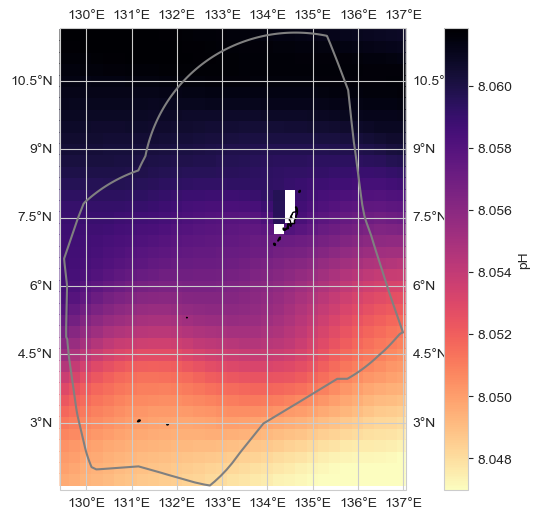

In [7]:
ax = plot_base_map(shp_eez = shp_eez, figsize = [10, 6])
im = ax.pcolor(data_xr.longitude, data_xr.latitude, data_xr.mean(dim='time')[dataset_id], transform=ccrs.PlateCarree(), 
                cmap = 'magma_r', 
                vmin = np.nanpercentile(data_xr.mean(dim = 'time')[dataset_id], 1), 
                vmax = np.nanpercentile(data_xr.mean(dim = 'time')[dataset_id], 99))
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, label= label)


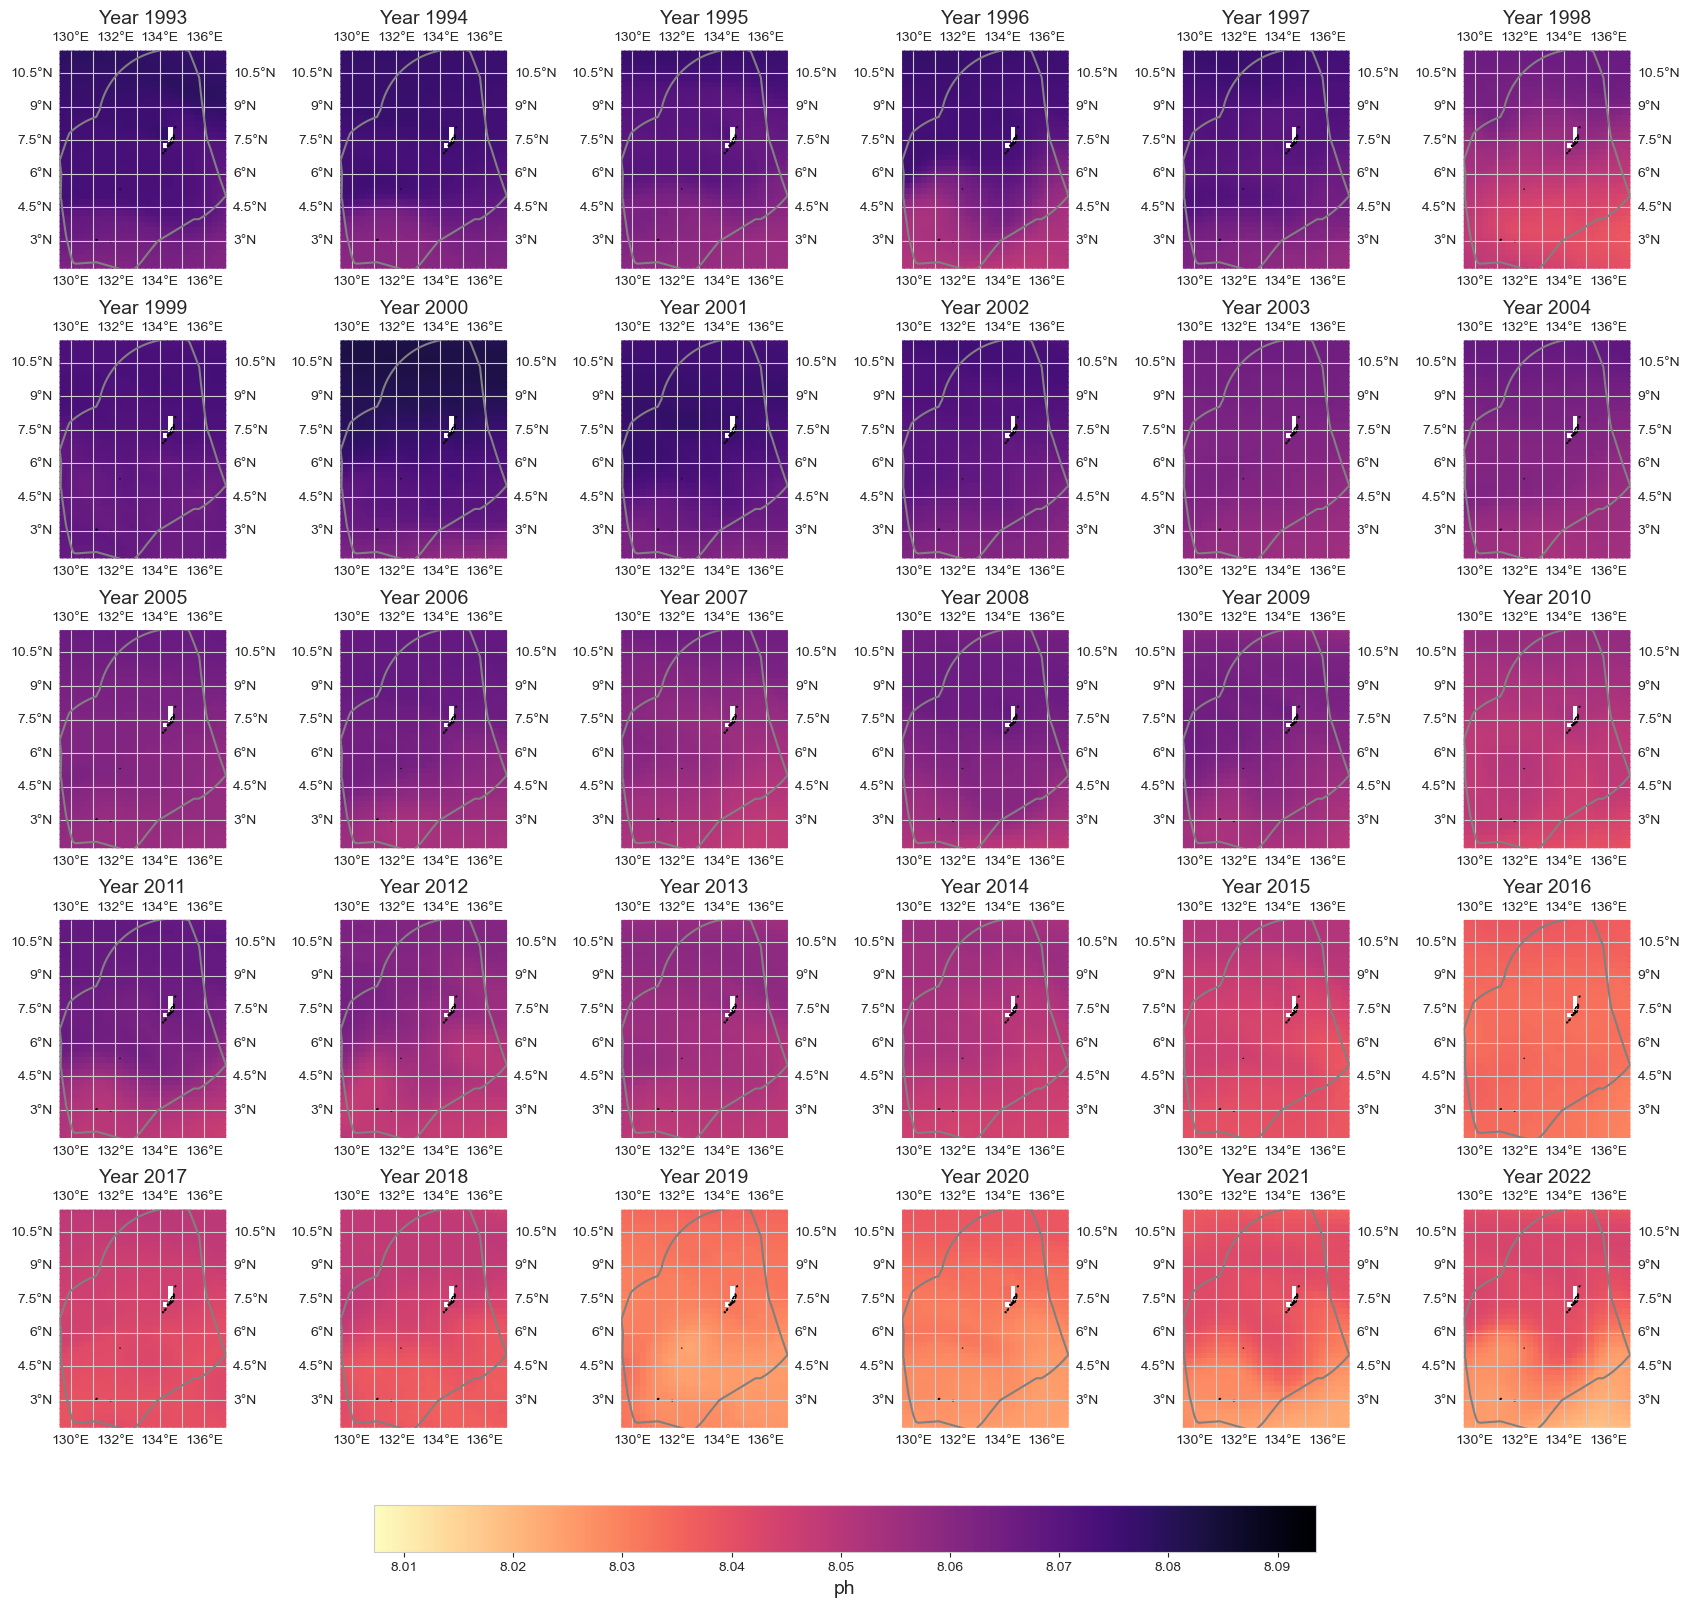

In [8]:
data_y = data_xr.resample(time='1YE').mean()
im = plot_map_subplots(data_y, dataset_id, shp_eez = shp_eez, cmap = 'magma_r', 
                  vmin = np.nanpercentile(data_xr.min(dim = 'time')[dataset_id], 1), 
                  vmax = np.nanpercentile(data_xr.max(dim = 'time')[dataset_id], 99),
                  cbar = 1)



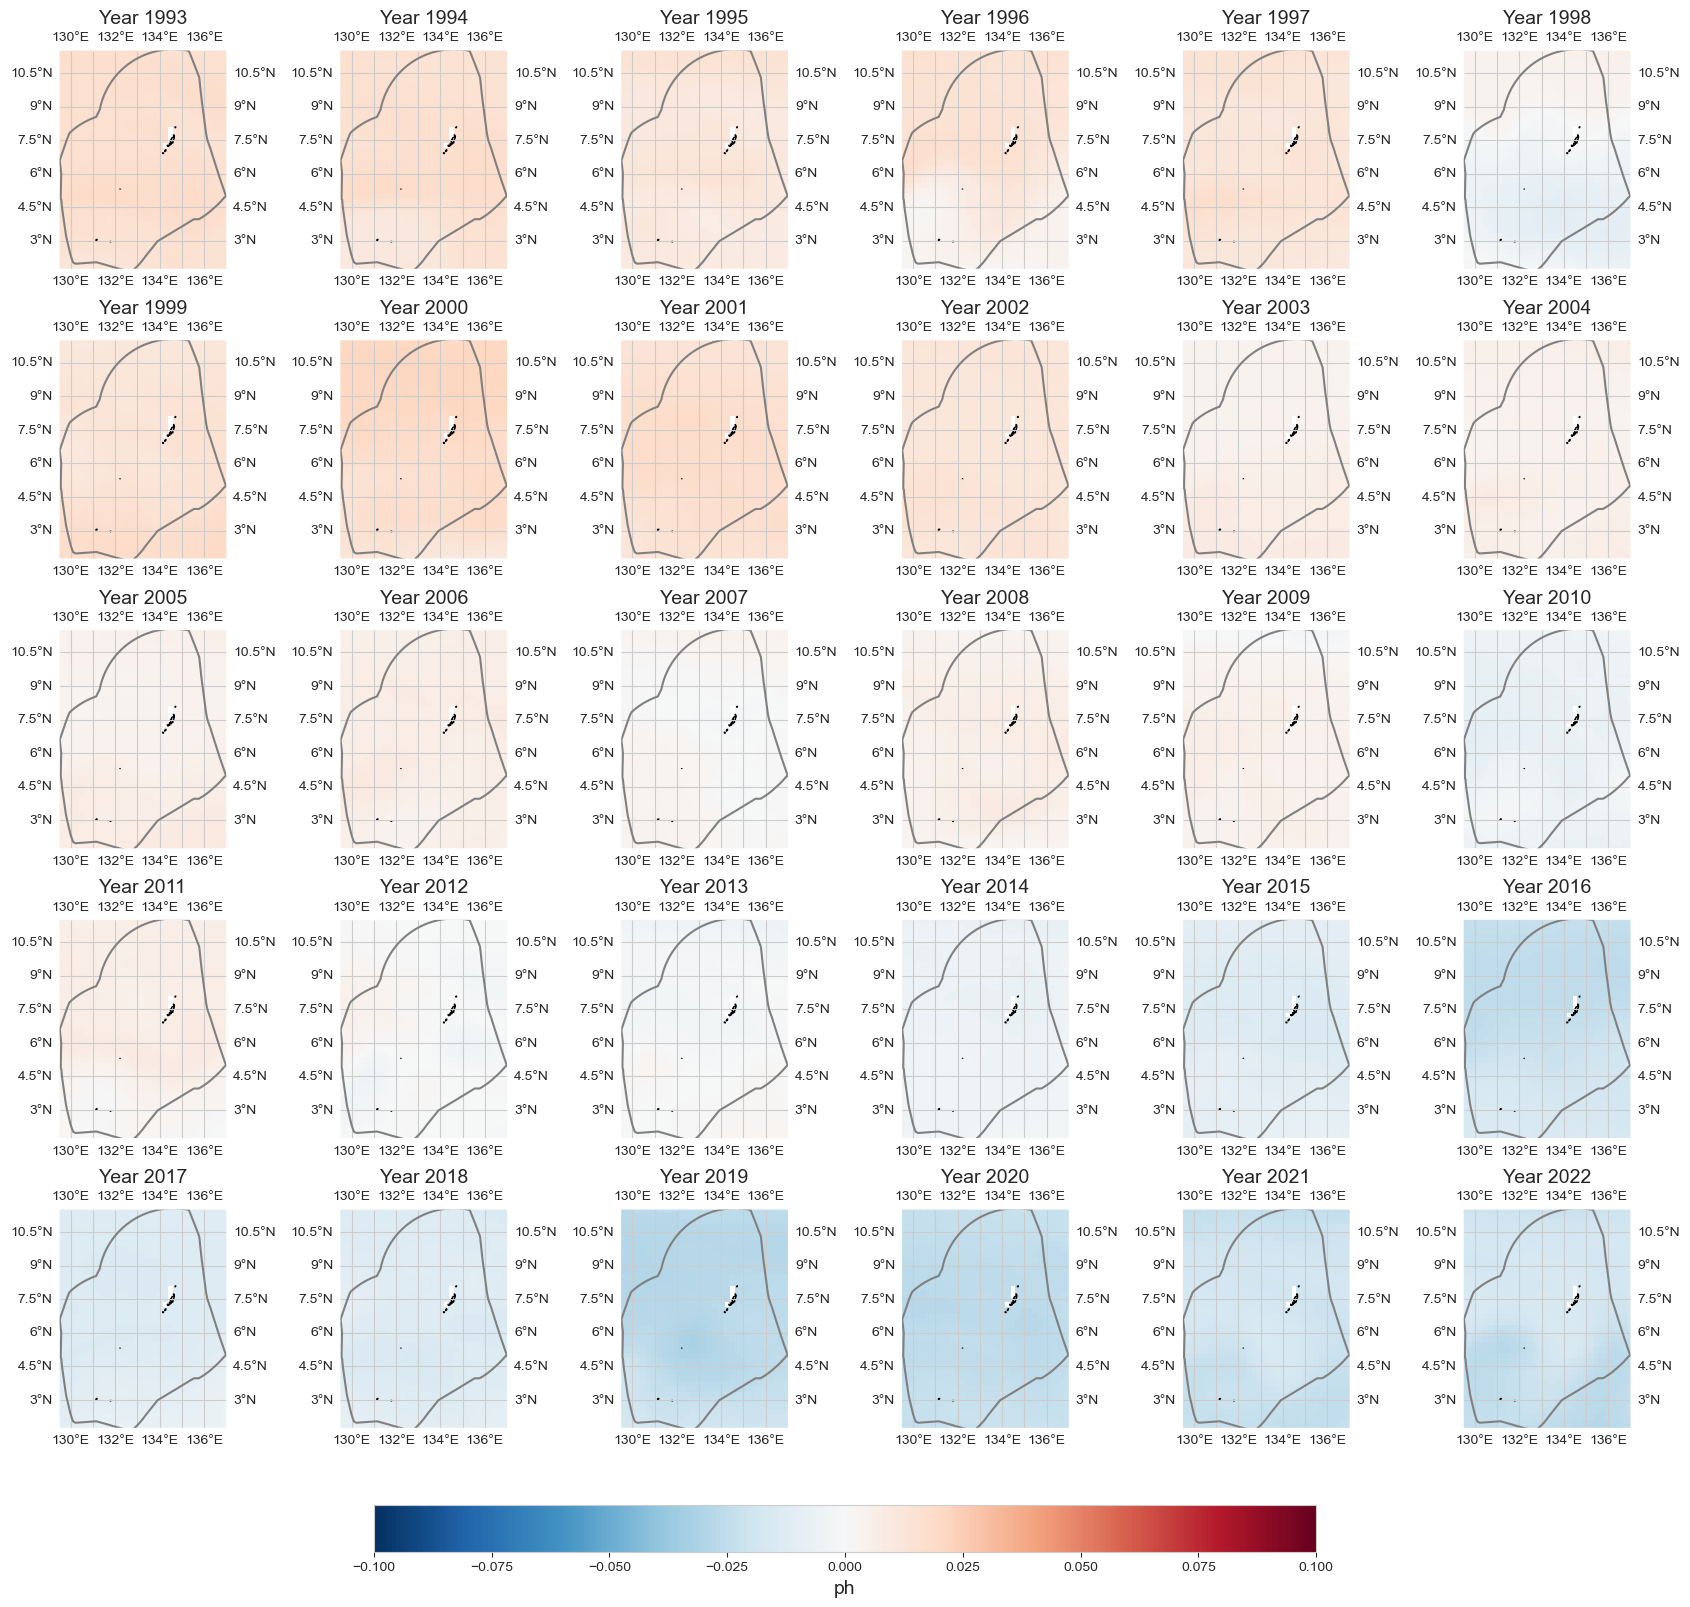

In [9]:
data_an = data_y - data_xr.mean(dim='time')
plot_map_subplots(data_an, dataset_id, shp_eez = shp_eez, cmap='RdBu_r', vmin=-.1, vmax=.1, cbar = 1)

## Mean Area

In [15]:
dict_plot = [{'data' : data_xr.mean(dim = ['longitude', 'latitude']).to_dataframe(), 
              'var' : dataset_id, 'ax' : 1, 'label' : 'pH - MEAN AREA'},]

In [16]:
fig = plot_timeseries_interactive(dict_plot, trendline=True, scatter_dict = None, figsize = (25, 12));

## Given point

In [12]:
loc = [7.37, 134.7]
dict_plot = [{'data' : data_xr.sel(longitude=loc[1], latitude=loc[0], method='nearest').to_dataframe(), 
              'var' : dataset_id, 'ax' : 1, 'label' : f'{label} at [{loc[0]}, {loc[1]}]'},]

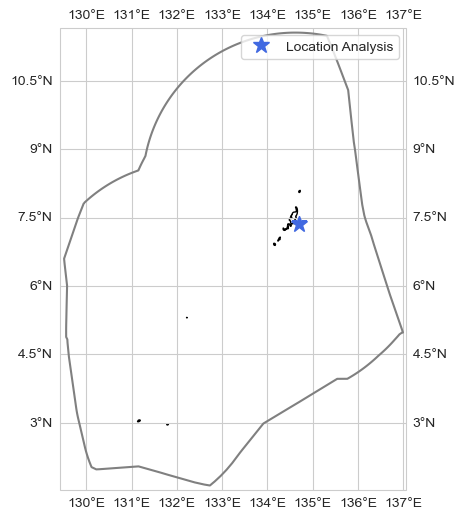

In [13]:
ax = plot_base_map(shp_eez = shp_eez, figsize = [10, 6])
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())
ax.plot(loc[1], loc[0], '*', markersize = 12, color = 'royalblue', transform=ccrs.PlateCarree(), label = 'Location Analysis')
ax.legend()

In [14]:
fig = plot_timeseries_interactive(dict_plot, trendline=True, scatter_dict = None, figsize = (25, 12));